# Problem 3: Food Truck Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lamb = 2            # rate
total_days = 100    # of Wednesdays
t_open = 0          # 11:00 AM
t_close = 120       # 1:00 PM
window_start = 55   # 11:55 AM
window_end = 65     # 12:05 Pm

rng = np.random.default_rng(174)

In [3]:
def generate_arrivals(rate, t0, t1, rng):
    arrivals = []
    t = t0
    while True:
        t += rng.exponential(1 / rate)
        if t > t1:
            break
        arrivals.append(t)
    return np.array(arrivals)

a.) Denote $E_i$ as the number of customers that arrive at the food truck between 11:55 AM and 12:05 PM on the $i$-th day. Do the following:

> i.) Compute $\frac{1}{100} \sum_{i=1}^{100} E_i$ and compute the sample variance for $\mathbb{E}_i$'s.

In [4]:
E_i = []
all_inters = []

for _ in range(total_days):
    arrivals = generate_arrivals(lamb, t_open, t_close, rng)
    E_i.append(np.sum((arrivals >= window_start) & (arrivals <= window_end)))
    if len(arrivals) >=2:
        all_inters.extend(np.diff(arrivals))
E_i = np.array(E_i)

print(f"(1/100) * sum E_i = {E_i.mean():.4f}")
print(f"Sample Variance(E_i) = {E_i.var(ddof=1):.4f}")

(1/100) * sum E_i = 20.2600
Sample Variance(E_i) = 18.1539


> ii.) Histogram

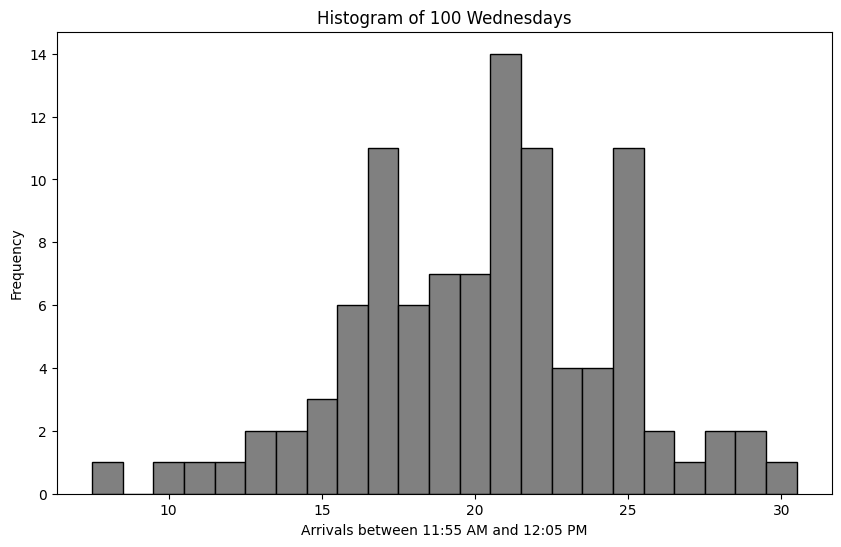

In [5]:
bin_range = np.arange(min(E_i), max(E_i) + 2) - 0.5

plt.figure(figsize=(10, 6))
plt.hist(E_i, bins=bin_range, edgecolor='black', color='gray')
plt.xlabel('Arrivals between 11:55 AM and 12:05 PM')
plt.ylabel('Frequency')
plt.title('Histogram of 100 Wednesdays')
plt.show()

> iii.) Inter-arrival times over 100 days, proportion > 1 minute, & comparison to $e^{-2}$

Proportion Longer than 1 minute

In [6]:
prop = (np.array(all_inters, dtype=float) > 1).mean()

print(f"Percentage of inter-arrival times longer than a minute = {prop:.4f}")
print(f"e^(-2) = {np.exp(-lamb):.4f}")

Percentage of inter-arrival times longer than a minute = 0.1327
e^(-2) = 0.1353
